<a href="https://colab.research.google.com/github/SurajGusain0007/Machine_learning_projects_with_Suraj/blob/main/Multiple_linear_reression_Backward_Elimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the libraries**

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Load the dataset**

In [5]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Bsic information of data frame**

In [6]:
df.shape

(50, 5)

**Check the datatypes**

In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

**Descirbe the dataframe**

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**information about dataframe**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Visualization(Understanding the data through visulization**

In [10]:
# we must understand our data to get the best resuts fro machine learning algorithm
#the fastest way to learn about our data to use data visualization technique

**we must understand our data to get the best resuts fro machine learning algorithm
the fastest way to learn about our data to use data visualization technique**

**univariant plots**

**Histograms**
** Density Plots**
** Box and whisker plot**

In [11]:
#Histograms
#Here we are able to see distribution of each feature in the form of histograms
#plot histogram grid

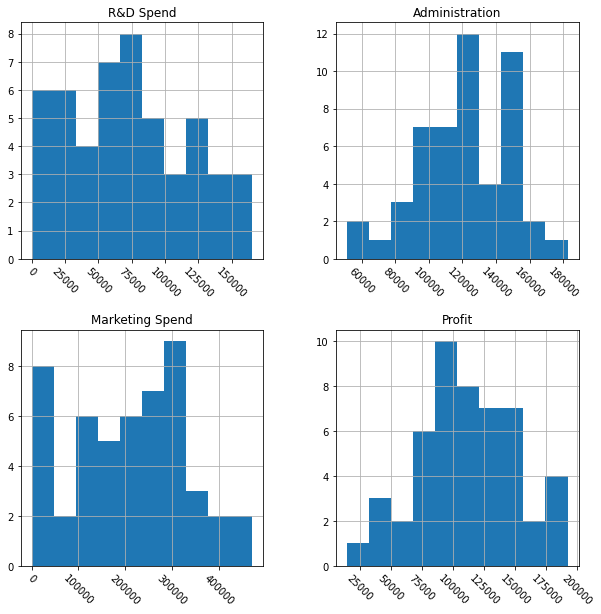

In [12]:
df.hist(xrot=-45,figsize=(10,10))
plt.show()

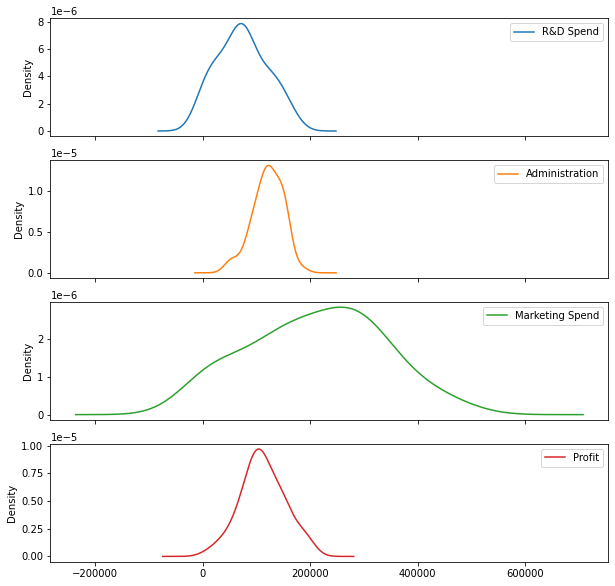

In [13]:
#Density plots
df.plot(kind='density',subplots=True,sharex=True,figsize=(10,10))
plt.show()

In [14]:
# Another  way of distribution of each feature by Box and whisker Plot here draw a line of median
# identify the outliers in this boxplot

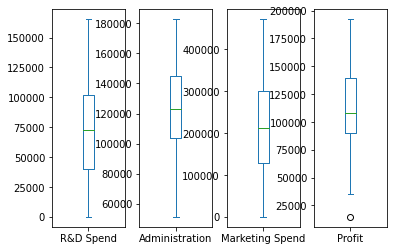

In [15]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False)
plt.show()

In [16]:
#Multivariant

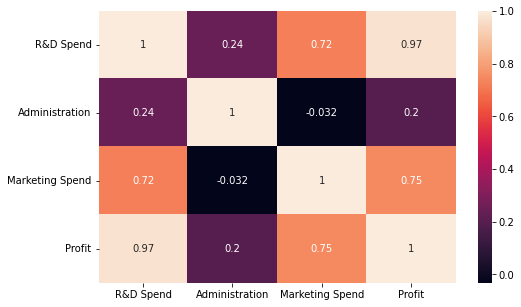

In [17]:
#correlation
import seaborn as sns
plt.figure(figsize=(8,5))
correlation=df.corr().round(4)
sns.heatmap(data=correlation,annot=True)

In [18]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [19]:
correlations=df.corr(method='pearson')
correlations

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [20]:
#scatter plot matrix
from pandas.plotting import scatter_matrix

<Figure size 1008x864 with 0 Axes>

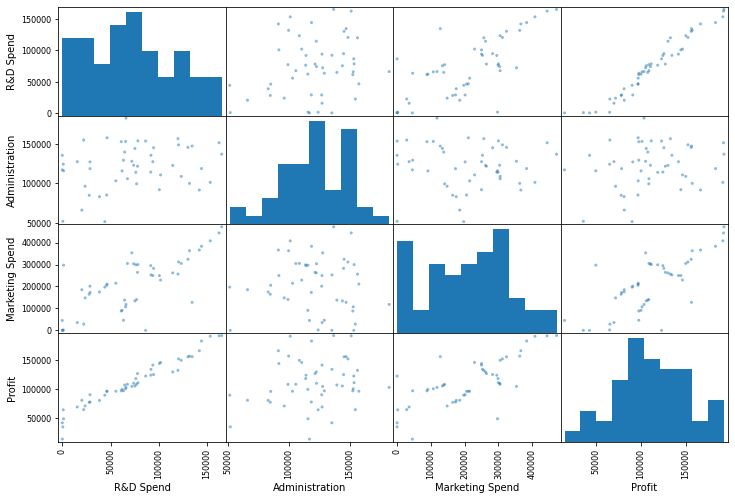

In [21]:
plt.figure(figsize=(14,12))
scatter_matrix(df,figsize=(12,8))
plt.show()

**visulization betwwen independent and dependent variables**

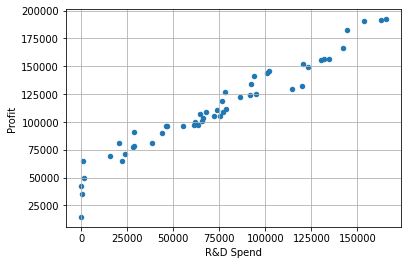

In [22]:
df.plot.scatter(x='R&D Spend',y='Profit')
plt.grid()
plt.show()

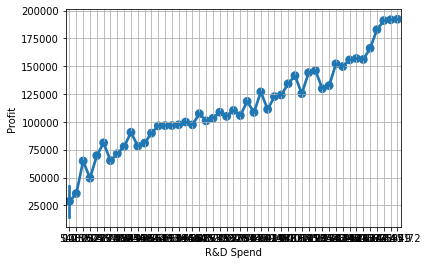

In [23]:
sns.pointplot(x='R&D Spend',y='Profit',data=df)
plt.grid()
plt.show()

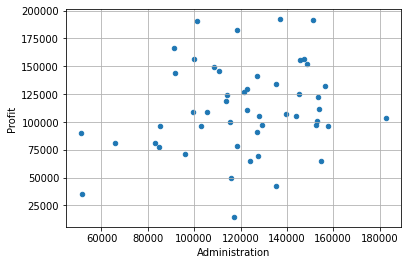

In [24]:
df.plot.scatter(x='Administration',y='Profit')
plt.grid()
plt.show()

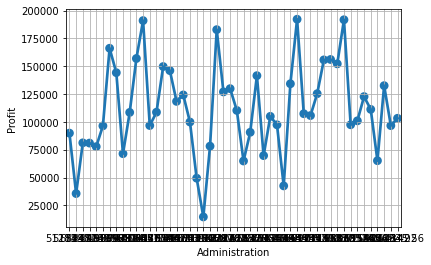

In [25]:
sns.pointplot(x='Administration',y='Profit',data=df)
plt.grid()
plt.show()

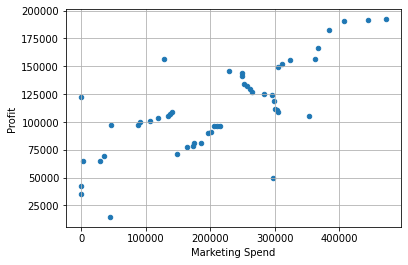

In [26]:
df.plot.scatter(x='Marketing Spend',y='Profit')
plt.grid()
plt.show()

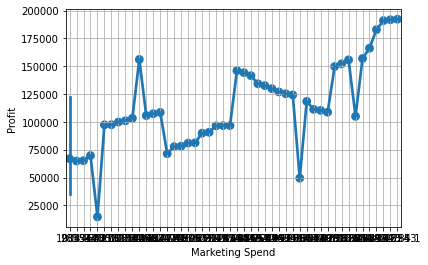

In [27]:
sns.pointplot(x='Marketing Spend',y='Profit',data=df)
plt.grid()
plt.show()

**Relationship between numerical and categorical features**

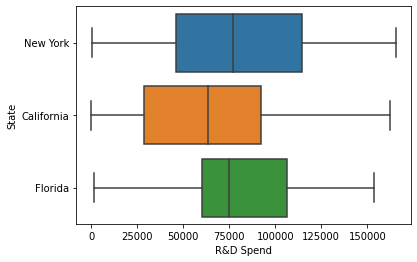

In [28]:
sns.boxplot(x='R&D Spend',y='State',data=df)
plt.show()

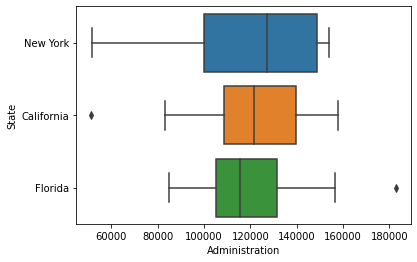

In [29]:
sns.boxplot(x='Administration',y='State',data=df)
plt.show()

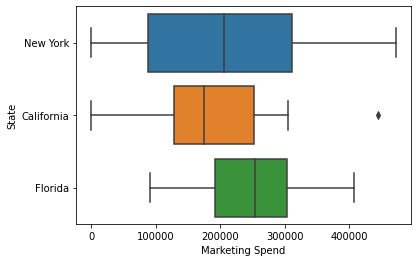

In [30]:
sns.boxplot(x='Marketing Spend',y='State',data=df)
plt.show()

**Data Cleaning**

In [31]:
df.duplicated().any()

False

In [32]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Feature Enginnering**

In [33]:
#Check the number of unique labels in State columb
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [34]:
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [35]:
#Creating dumby variables since our dataset has one categorical variable

In [36]:
dummies=pd.get_dummies(df.State)

In [37]:
merge=pd.concat([df,dummies],axis=1)

In [38]:
merge.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [39]:
df=merge.drop(['State','California'],axis=1)

In [40]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [41]:
target_feature='Profit'
y=df[target_feature]
x=df.drop(target_feature,axis=1)

In [42]:
#Split Dataset to Train and test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Build the Model**

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg=LinearRegression()

In [47]:
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
#ntercept
reg.intercept_
print("intercept(b) is",reg.intercept_)

intercept(b) is 42554.16761773238


In [49]:
#coefficient
reg.coef_
print("coefficient(m) is",reg.coef_)

coefficient(m) is [ 7.73467193e-01  3.28845975e-02  3.66100259e-02 -9.59284160e+02
  6.99369053e+02]


**Apply the model on test Dataset to get the predict values**

In [50]:
y_pred=reg.predict(x_test)
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

**To Compare the actual output values with the predict values**

In [51]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred,'variance':y_test-y_pred})

In [52]:
df1

,Actual,Predicted,variance
28,103282.38,103015.201598,267.178402
11,144259.40,132582.277608,11677.122392
10,146121.95,132447.738452,13674.211548
41,77798.83,71976.098513,5822.731487
2,191050.39,178537.482211,12512.907789
27,105008.31,116161.242302,-11152.932302
38,81229.06,67851.692097,13377.367903
31,97483.56,98791.733747,-1308.173747
22,110352.25,113969.435330,-3617.185330
4,166187.94,167921.065696,-1733.125696


**Evalution metrices of regression algorithm**

In [53]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
print("score",score)

score 93.47068473282422


In [54]:
from sklearn import metrics
print("mae",metrics.mean_absolute_error(y_test,y_pred))
print('mse',metrics.mean_squared_error(y_test,y_pred))
print("rmse",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mae 7514.293659640614
mse 83502864.03257766
rmse 9137.99015279496


**Building the optimal model using Backward Elimination**

In [55]:
import numpy as np
import statsmodels.api as sm
x=np.append(arr=np.ones((50,1)).astype(int),values=x,axis=1)

In [56]:
x

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.2333488e+05,

In [65]:
x_opt=x[:,[0,1,2,3,4,5]]

In [66]:
x_opt

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.2333488e+05,

In [67]:

regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.34e-27
Time:                        22:53:25   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**In the above image we can clearly see the p valuyes of all the variables.Here x4,x5 are dummy variables x1 is R and D sopend ,x2 is Administration ,X 3 is Marketing Spend For this table we will choose highest p values which is for x=0.990 ,Now we have the highest p values which is greater than the Sl value. so we will remove the highest p value which is greateer than the Sl value**

In [69]:
x_opt=x[:,[0,1,2,3,4]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           8.49e-29
Time:                        23:00:50   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1             0.8060      0.046     17.606      0.000       0.714       0.898
x2            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x3             0.0270      0.017      1.592      0.118      -0.007       0.061
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
x_opt=x[:,[0,1,2,3]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        23:01:20   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
x_opt=x[:,[0,1,3]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           2.16e-31
Time:                        23:09:55   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
x_opt=x[:,[0,1]]
regressor_OLS=sm.OLS(endog=y,exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           3.50e-32
Time:                        23:10:24   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Estimate the perfomance**

**now we will check the score only one feature variable(R&D spend)Our Dataset now looks like**

In [75]:
df2=pd.read_csv("50_Startups.csv")

In [76]:
df2.shape

(50, 5)

In [77]:
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [79]:
df2=df2.drop(['Administration','Marketing Spend','State'],axis='columns')

In [80]:
df2.head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


In [91]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,1]

In [92]:
x.shape

(50, 1)

In [93]:
y.shape

(50,)

In [94]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [95]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [96]:
reg.intercept_

48416.297661385026

In [97]:
reg.coef_

array([0.8516228])

In [98]:
y_pred=reg.predict(x_test)

In [101]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)*100
score

94.64587607787219